# 12.2 Assignment: Term Project

## Question/Hypothesis

### "BMI is a significant predictor of medical expenses, regardless of smoking status."

### **Reasoning:** This hypothesis could explore BMI’s impact on expenses and whether it remains significant across different smoking statuses.

### Dataset Exploration

#### Data Card: Medical Insurance Cost Prediction

**Dataset Link**: [Kaggle Medical Insurance Cost Prediction Dataset](https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction/data?select=medical_insurance.csv)

#### Overview

The medical insurance dataset provides a detailed view of various demographic and health-related factors that impact medical expenses. Key variables include age, sex, Body Mass Index (BMI), smoking status, number of dependents (children), residential region, and the total medical expenses incurred. These attributes offer a comprehensive basis for analyzing and predicting healthcare costs, making the dataset ideal for machine learning applications aimed at estimating insurance expenses for potential policyholders.

#### Purpose and Utility

The primary purpose of this dataset is to identify and quantify the factors contributing most significantly to medical costs, enabling insurance companies to refine pricing strategies and assess customer risk more accurately. By understanding how each factor—such as BMI or smoking status—affects expenses, companies can create models to forecast potential costs and manage risk across different policyholder profiles.

Leveraging this data, insurers can enhance decision-making in areas such as:
- **Pricing Models**: Adjusting premiums based on risk factors identified through model predictions.
- **Risk Assessment**: Understanding high-cost indicators like smoking status or high BMI to anticipate future expenses.
- **Customer Segmentation**: Grouping policyholders by risk profiles for targeted interventions or specialized plans.

#### Dataset Summary

- **Total Rows**: 2,700
- **Total Columns**: 7

#### Columns

1. **Age**: Age of the policyholder
2. **Sex**: Gender of the policyholder
3. **BMI (Body Mass Index)**: A metric derived from height and weight, often related to health risk
4. **Children**: Number of dependents
5. **Smoker**: Smoking status (Yes/No)
6. **Region**: Residential area of the policyholder
7. **Charges**: Total medical expenses incurred

This dataset provides essential insights into the factors influencing medical expenses, offering a robust foundation for building predictive models that enhance decision-making in health insurance analytics.



#### Relevant Columns in the Dataset

The dataset includes the following key columns that are important predictors of medical expenses:

- **Age**: A quantifiable numerical variable representing the age of the policyholder, which is often a significant predictor of medical expenses due to age-related health risks.

- **BMI (Body Mass Index)**: A quantifiable numerical variable calculated from height and weight. Higher BMI values are typically associated with increased health risks, making this a critical factor in assessing medical costs.

- **Smoking Status**: Although this is a categorical variable (smoker or non-smoker), it can be transformed into a quantifiable attribute by encoding smokers as **1** and non-smokers as **0**. This transformation enables several analytical possibilities:
  - **Inclusion in Predictive Models**: By encoding smoker status as a binary variable, it can be directly incorporated into regression or machine learning models. These models can then weigh the impact of smoking on predicted medical costs, providing insights into the cost impact of smoking.
  - **Statistical Analysis**: Converting smoker status into a numerical format allows for correlation and regression analyses, enabling us to measure how strongly smoking correlates with higher medical expenses.
  - **Interpretability**: In regression models, the coefficient for smoker status quantifies the additional cost associated with smoking, offering interpretable insights into the extent to which smoking contributes to increased expenses.
  
  This binary transformation of smoker status is valuable for data analysis, as it leverages the strong correlation between smoking and health-related costs.

- **Number of Children**: A quantifiable variable indicating the number of dependents a policyholder has. This factor may influence health-related expenses, as family dynamics can affect the type and amount of healthcare services utilized, potentially increasing costs.

- **Charges**: A quantifiable variable representing the total medical expenses incurred by the policyholder. This is the target variable for prediction models and provides a measure of actual medical costs based on various personal and lifestyle factors. By analyzing **charges** in relation to other variables (such as age, BMI, smoking status, and number of children), we can better understand the factors driving these costs.

These columns collectively form a robust basis for analyzing and predicting medical expenses, with each variable contributing unique insights into the factors that drive insurance costs.


#### Import Libraries

In [135]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style('whitegrid')
plt.style.use('ggplot')
sns.set_context('notebook')

%matplotlib inline
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

#### Import Dataset

In [137]:
dfInput = pd.read_csv(r'medical_insurance.csv')
dfInput.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Display dataset shape and info

In [139]:
print(f"Data has: {dfInput.shape[0]} rows\nData has: {dfInput.shape[1]} columns")

Data has: 2772 rows
Data has: 7 columns


In [140]:
dfInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [141]:
# Generate descriptive statistics
dfInput.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2772.0,39.109668,14.081459,18.0000,26.000,39.00000,51.0000,64.00000
bmi,2772.0,30.701349,6.129449,15.9600,26.220,30.44750,34.7700,53.13000
children,2772.0,1.101732,1.214806,0.0000,0.000,1.00000,2.0000,5.00000
charges,2772.0,13261.369959,12151.768945,1121.8739,4687.797,9333.01435,16577.7795,63770.42801


In [142]:
# Columns of interest
columns = ['age', 'bmi', 'children', 'charges']

# Encoding 'smoker' as a binary variable (1 for smoker, 0 for non-smoker)
dfInput['smoker'] = dfInput['smoker'].map({'yes': 1, 'no': 0})

# Adding 'smoker' to the columns of interest for analysis
columns.append('smoker')

#### Plot histograms and analyze distributions

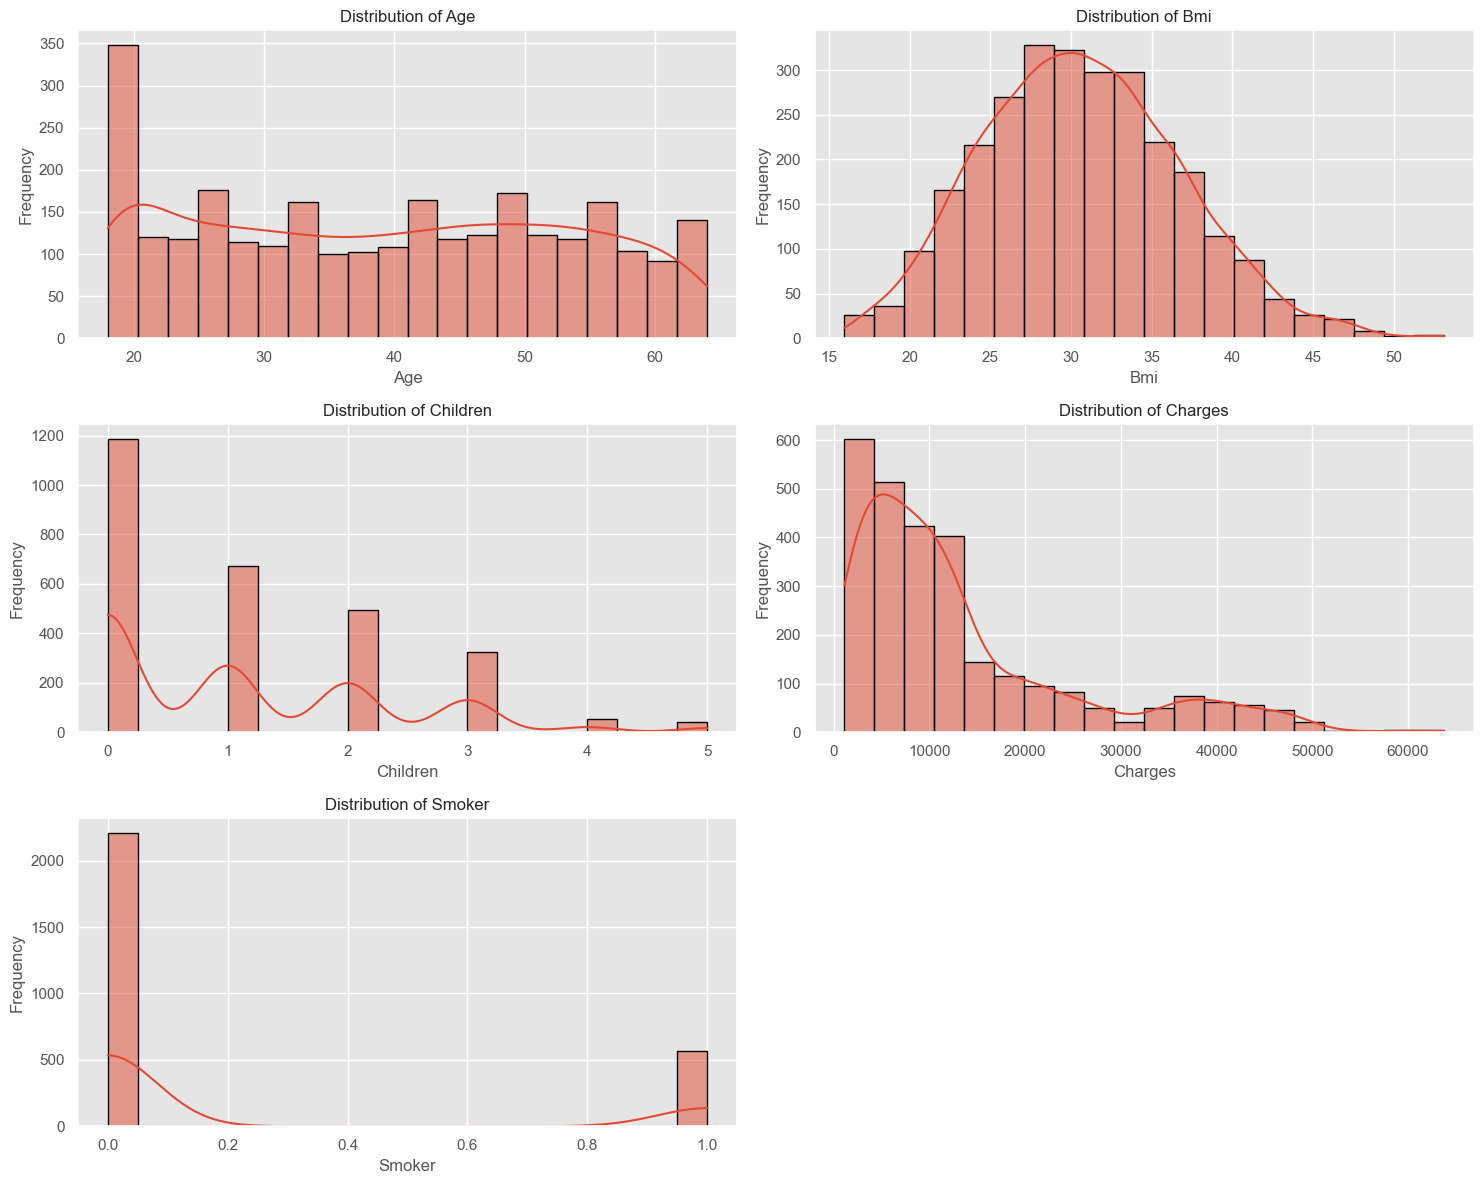

In [144]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(dfInput[col], bins=20, kde=True, edgecolor='black')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Summary and Analysis of Histograms for Key Variables

The histograms below illustrate the distribution of five key variables in the dataset: **age**, **BMI**, **children**, **charges**, and **smoker status**. Each histogram provides insight into the frequency distribution, skewness, and potential outliers for these variables.

##### 1. Age
- **Distribution**: The age variable shows a fairly uniform distribution across a range of ages, indicating that the dataset includes a broad spectrum of age groups.
- **Outliers**: There are no significant outliers, as extreme age values (such as very young or elderly individuals) appear plausible.
- **Conclusion**: All age values seem realistic, so no adjustments are necessary.

##### 2. BMI (Body Mass Index)
- **Distribution**: The BMI variable is approximately normally distributed, though it shows a slight positive skew with more values concentrated in the higher range.
- **Outliers**: Higher BMI values suggest a few individuals with obesity, and lower values indicate some underweight individuals.
- **Conclusion**: BMI outliers should be retained as they represent meaningful health conditions relevant to medical cost analysis.

##### 3. Children
- **Distribution**: The number of children is right-skewed, with the majority of values clustered around zero to two children. Only a few individuals have more than three children.
- **Outliers**: Families with more than four children are rare, but these cases are plausible and do not require removal.
- **Conclusion**: No action is needed for outliers in the children variable, as these values reflect diverse family structures.

##### 4. Charges
- **Distribution**: The charges variable shows a significant positive skew, with a few individuals incurring extremely high medical expenses.
- **Outliers**: High charges likely correspond to individuals with serious health issues or high healthcare utilization, making them essential for understanding cost drivers.
- **Conclusion**: Retaining high charge values is crucial for accurate medical cost analysis, though transformations (e.g., log transformation) could be applied to reduce skewness and improve model performance.

##### 5. Smoker Status
- **Distribution**: Smoker status is a binary variable (1 for smokers, 0 for non-smokers) and does not have a typical continuous distribution.
- **Outliers**: Since this variable is binary, it lacks traditional outliers.
- **Conclusion**: Smoker status is a critical variable for modeling, as smoking behavior is known to significantly impact medical expenses. No adjustments are needed for this variable.

##### Overall Analysis
The distributions of age, BMI, children, and smoker status generally appear reasonable with realistic ranges, while charges exhibit notable skewness due to high-cost cases. Retaining all values, particularly outliers in charges, will help capture the range of healthcare costs. For predictive modeling, transformations may be applied to normalize charges, improving model accuracy.


#### Identifying and explaining outliers for each variable

In [147]:
for col in columns:
    # Calculate the IQR (Interquartile Range)
    Q1 = dfInput[col].quantile(0.25)
    Q3 = dfInput[col].quantile(0.75)
    IQR = Q3 - Q1
    # Determine outliers using 1.5*IQR rule
    outliers = dfInput[(dfInput[col] < (Q1 - 1.5 * IQR)) | (dfInput[col] > (Q3 + 1.5 * IQR))]
    outlier_count = outliers.shape[0]
    
    print(f"Variable '{col}': {outlier_count} potential outliers detected.")
    
    # Analysis and handling of outliers
    if col == 'age':
        print("Outliers in age are uncommon but possible due to extreme ages. Extreme values can be retained if they are realistic.")
    elif col == 'bmi':
        print("BMI outliers often represent underweight or obese individuals, and these values should be kept as they reflect real health conditions.")
    elif col == 'children':
        print("Outliers in 'children' indicate families with more dependents. These are rare but plausible; no need for removal.")
    elif col == 'charges':
        print("High charges likely represent cases with serious health issues. We may consider transformations to reduce skewness but retain these values.")
    elif col == 'smoker':
        print("Since smoker is binary, it has no traditional outliers. 1 represents smokers and 0 represents non-smokers.")

print("\nNote: Depending on model sensitivity, charge outliers may be transformed (e.g., log transformation) to normalize skewed distributions.")

Variable 'age': 0 potential outliers detected.
Outliers in age are uncommon but possible due to extreme ages. Extreme values can be retained if they are realistic.
Variable 'bmi': 14 potential outliers detected.
BMI outliers often represent underweight or obese individuals, and these values should be kept as they reflect real health conditions.
Variable 'children': 0 potential outliers detected.
Outliers in 'children' indicate families with more dependents. These are rare but plausible; no need for removal.
Variable 'charges': 296 potential outliers detected.
High charges likely represent cases with serious health issues. We may consider transformations to reduce skewness but retain these values.
Variable 'smoker': 564 potential outliers detected.
Since smoker is binary, it has no traditional outliers. 1 represents smokers and 0 represents non-smokers.

Note: Depending on model sensitivity, charge outliers may be transformed (e.g., log transformation) to normalize skewed distributions.

#### Descriptive characteristics about the variables: Mean, Mode, Spread, and Tails

In [149]:
# Initialize an empty dictionary to store statistics for each column
statistics = {}

# Calculate mean, mode, spread (standard deviation), and tails (minimum and maximum) for each variable
for col in columns:
    # Mean
    mean_value = dfInput[col].mean()
    
    # Mode - if there are multiple modes, we take the first one
    mode_value = dfInput[col].mode()[0]
    
    # Spread - standard deviation
    spread_value = dfInput[col].std()
    
    # Tails - minimum and maximum values to understand range
    min_value = dfInput[col].min()
    max_value = dfInput[col].max()
    
    # Store the calculated values in the dictionary
    statistics[col] = {
        'Mean': mean_value,
        'Mode': mode_value,
        'Spread (Std Dev)': spread_value,
        'Min': min_value,
        'Max': max_value
    }

# Convert the statistics dictionary to a DataFrame for better visualization
statistics_df = pd.DataFrame(statistics).T
print(statistics_df)

# Output each characteristic with detailed comments
for col, stats in statistics.items():
    print(f"\n--- Statistics for '{col.capitalize()}' ---")
    print(f"Mean: {stats['Mean']}")
    print(f"Mode: {stats['Mode']}")
    print(f"Spread (Standard Deviation): {stats['Spread (Std Dev)']}")
    print(f"Minimum (Left Tail): {stats['Min']}")
    print(f"Maximum (Right Tail): {stats['Max']}")
    
    # Interpretation based on descriptive statistics
    if col == 'age':
        print("Interpretation: The mean and spread indicate a balanced distribution of ages, "
              "showing a diverse age profile for policyholders.")
    elif col == 'bmi':
        print("Interpretation: The mean and spread of BMI provide insight into typical body weight-to-height ratios, "
              "which are significant for analyzing health risks associated with obesity.")
    elif col == 'children':
        print("Interpretation: The mean and mode suggest that most policyholders have few dependents, "
              "with a right-skewed distribution showing that larger families are less common.")
    elif col == 'charges':
        print("Interpretation: The mean and spread of charges highlight considerable variability in medical expenses, "
              "suggesting a wide range of healthcare utilization and cost among policyholders.")
    elif col == 'smoker':
        print("Interpretation: The mean of smoker status, being binary, shows the proportion of smokers in the dataset, "
              "while the mode indicates non-smokers are more prevalent. This variable is crucial for assessing health costs.")

                  Mean       Mode  Spread (Std Dev)        Min          Max
age          39.109668    18.0000         14.081459    18.0000     64.00000
bmi          30.701349    32.3000          6.129449    15.9600     53.13000
children      1.101732     0.0000          1.214806     0.0000      5.00000
charges   13261.369959  1121.8739      12151.768945  1121.8739  63770.42801
smoker        0.203463     0.0000          0.402647     0.0000      1.00000

--- Statistics for 'Age' ---
Mean: 39.10966810966811
Mode: 18
Spread (Standard Deviation): 14.081459420836477
Minimum (Left Tail): 18
Maximum (Right Tail): 64
Interpretation: The mean and spread indicate a balanced distribution of ages, showing a diverse age profile for policyholders.

--- Statistics for 'Bmi' ---
Mean: 30.70134920634921
Mode: 32.3
Spread (Standard Deviation): 6.129448694965217
Minimum (Left Tail): 15.96
Maximum (Right Tail): 53.13
Interpretation: The mean and spread of BMI provide insight into typical body weight-to-hei

####  Probability Mass Function (PMF) for the charges variable under two different scenarios—smokers and non-smokers

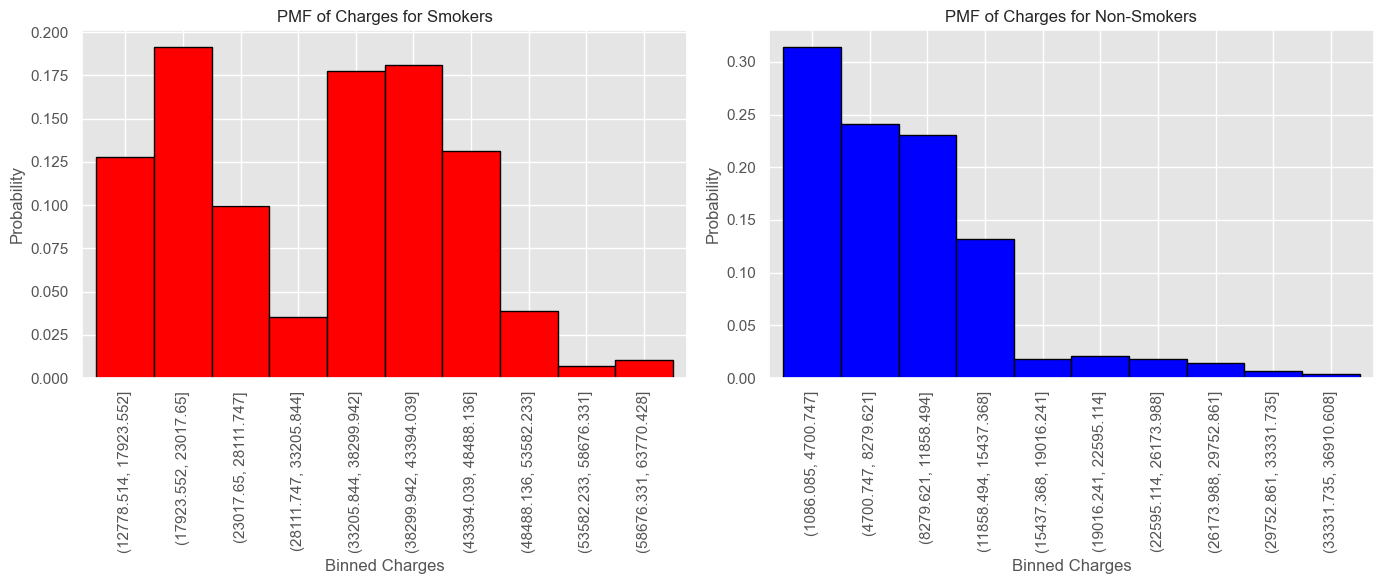


--- Interpretation ---
1. The PMF for charges shows how medical expenses are distributed differently for smokers and non-smokers.
2. Smokers tend to have higher charges with a distribution skewed towards high medical expenses.
3. Non-smokers show a more balanced distribution, with a higher probability of lower medical expenses.
4. This comparison highlights that smokers generally incur higher costs, which is crucial for health insurance cost analysis.


In [151]:
# Function to calculate PMF from a Pandas Series after binning
def calculate_pmf(series, bins=50):
    """Calculate PMF for a given data series after binning."""
    binned_series = pd.cut(series, bins=bins)  # Bin the data
    pmf = binned_series.value_counts(normalize=True).sort_index()  # Calculate PMF on binned data
    return pmf

# Separate the data based on smoker status
smoker_charges = dfInput[dfInput['smoker'] == 1]['charges']
non_smoker_charges = dfInput[dfInput['smoker'] == 0]['charges']

# Calculate PMFs for both smokers and non-smokers with binning
pmf_smoker = calculate_pmf(smoker_charges, bins=10)
pmf_non_smoker = calculate_pmf(non_smoker_charges, bins=10)

# Plot the PMFs for smokers and non-smokers
plt.figure(figsize=(14, 6))

# Plot for smokers
plt.subplot(1, 2, 1)
pmf_smoker.plot(kind='bar', width=1, color='red', edgecolor='black')
plt.title('PMF of Charges for Smokers')
plt.xlabel('Binned Charges')
plt.ylabel('Probability')
plt.grid(True)

# Plot for non-smokers
plt.subplot(1, 2, 2)
pmf_non_smoker.plot(kind='bar', width=1, color='blue', edgecolor='black')
plt.title('PMF of Charges for Non-Smokers')
plt.xlabel('Binned Charges')
plt.ylabel('Probability')
plt.grid(True)

plt.tight_layout()
plt.show()

# Interpretation of PMFs for Charges by Smoker Status
print("\n--- Interpretation ---")
print("1. The PMF for charges shows how medical expenses are distributed differently for smokers and non-smokers.")
print("2. Smokers tend to have higher charges with a distribution skewed towards high medical expenses.")
print("3. Non-smokers show a more balanced distribution, with a higher probability of lower medical expenses.")
print("4. This comparison highlights that smokers generally incur higher costs, which is crucial for health insurance cost analysis.")


#### Cumulative Distribution Function (CDF) for a "Charges" variable in the dataset.

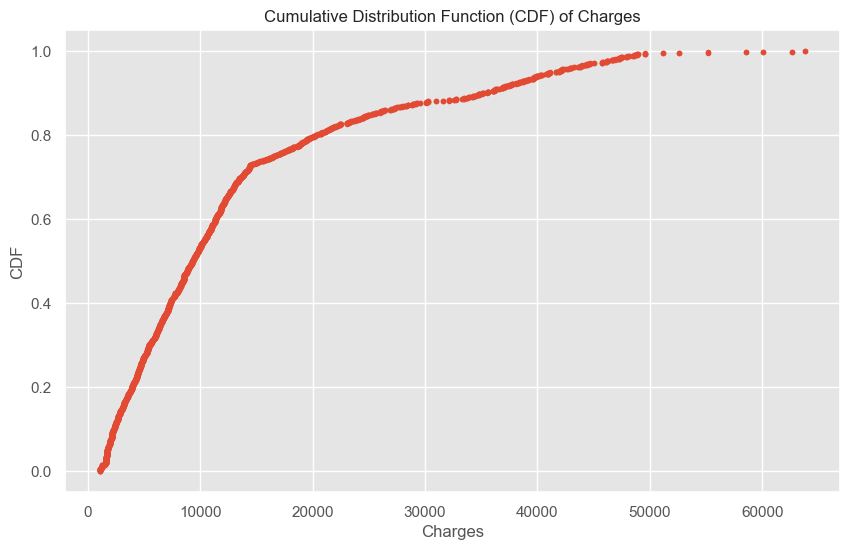


--- Interpretation ---
1. The CDF for charges indicates the proportion of policyholders with medical expenses up to a given amount.
2. For example, we can observe what percentage of policyholders have expenses below a specific threshold.
3. The steep parts of the CDF curve indicate common values, while flatter sections represent less frequent charges.
4. This CDF helps us understand the distribution of charges in a cumulative manner, showing that a significant portion of the population incurs lower costs.
5. Overall, this insight helps address the question of how medical costs vary, identifying the threshold at which costs start to increase for a smaller portion of policyholders.


In [153]:
# Define a function to calculate the CDF of a variable
def calculate_cdf(data):
    """Calculate the CDF for a dataset."""
    sorted_data = np.sort(data)  # Sort the data
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)  # CDF values from 0 to 1
    return sorted_data, cdf

# Calculate the CDF for the charges variable
charges_data = dfInput['charges']
sorted_charges, charges_cdf = calculate_cdf(charges_data)

# Plot the CDF for charges
plt.figure(figsize=(10, 6))
plt.plot(sorted_charges, charges_cdf, marker='.', linestyle='none')
plt.xlabel('Charges')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Charges')
plt.grid(True)
plt.show()

# Interpretation of the CDF for Charges
print("\n--- Interpretation ---")
print("1. The CDF for charges indicates the proportion of policyholders with medical expenses up to a given amount.")
print("2. For example, we can observe what percentage of policyholders have expenses below a specific threshold.")
print("3. The steep parts of the CDF curve indicate common values, while flatter sections represent less frequent charges.")
print("4. This CDF helps us understand the distribution of charges in a cumulative manner, showing that a significant portion of the population incurs lower costs.")
print("5. Overall, this insight helps address the question of how medical costs vary, identifying the threshold at which costs start to increase for a smaller portion of policyholders.")


#### Analytical Distribution

##### To model the distribution of a variable from the dataset analytically, lets use the Normal (Gaussian) distribution to approximate the distribution of the charges variable. Given that charges can reflect a wide range of healthcare expenses, modeling it with a normal distribution helps smooth the data and simplifies further analysis.

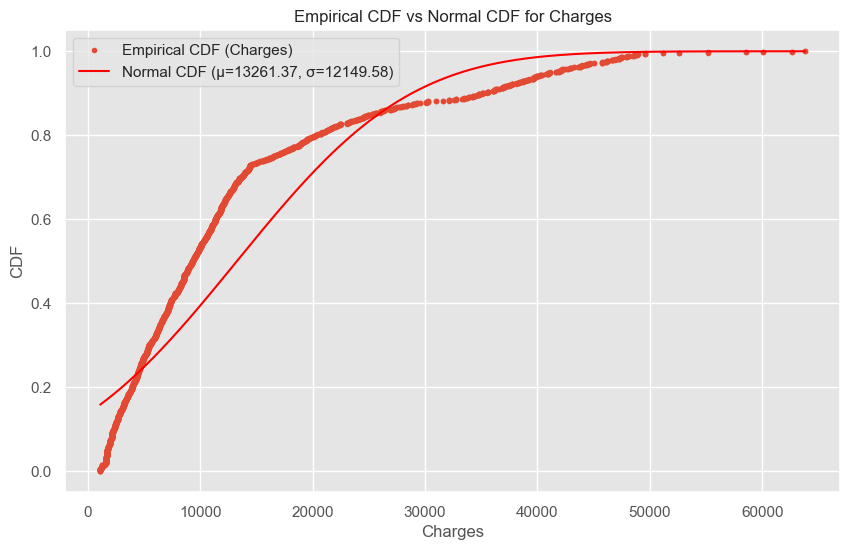


--- Interpretation ---
1. The empirical CDF represents the actual distribution of charges in the dataset.
2. The fitted normal CDF is an analytical model, providing a smooth approximation of the charges distribution.
3. While the normal model captures the general trend, deviations in the tails suggest a skew in real data, as charges may have extreme high values.
4. This normal model simplifies the distribution for analysis, but it may not fully represent real-world complexity in medical expenses.


In [156]:
# Import necessary libraries for analytical modeling
from scipy.stats import norm

# Define a function to calculate the CDF for empirical data
def empirical_cdf(data):
    """Calculate the empirical CDF for a dataset."""
    sorted_data = np.sort(data)  # Sort the data
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)  # CDF values from 0 to 1
    return sorted_data, cdf

# Calculate empirical CDF for charges
charges_data = dfInput['charges']
sorted_charges, charges_cdf = empirical_cdf(charges_data)

# Fit a normal distribution to the charges data
mu, sigma = norm.fit(charges_data)  # Estimate the mean and standard deviation

# Calculate the CDF of the fitted normal distribution
x = np.linspace(min(charges_data), max(charges_data), 1000)
fitted_cdf = norm.cdf(x, loc=mu, scale=sigma)  # Use estimated parameters

# Plot the empirical CDF and the fitted normal CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_charges, charges_cdf, marker='.', linestyle='none', label='Empirical CDF (Charges)')
plt.plot(x, fitted_cdf, color='red', label=f'Normal CDF (µ={mu:.2f}, σ={sigma:.2f})')
plt.xlabel('Charges')
plt.ylabel('CDF')
plt.title('Empirical CDF vs Normal CDF for Charges')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation of the Normal CDF Fit for Charges
print("\n--- Interpretation ---")
print("1. The empirical CDF represents the actual distribution of charges in the dataset.")
print("2. The fitted normal CDF is an analytical model, providing a smooth approximation of the charges distribution.")
print("3. While the normal model captures the general trend, deviations in the tails suggest a skew in real data, as charges may have extreme high values.")
print("4. This normal model simplifies the distribution for analysis, but it may not fully represent real-world complexity in medical expenses.")


#### Scatter Plots

#### To explore the relationship between smoker status and charges, creating scatter plots for:

- **Smoker Status vs Charges:** This plot will compare charges for smokers and non-smokers.
- **Age vs Charges for Smokers and Non-Smokers:** This plot will help examine how age impacts charges separately for smokers and non-smokers.

Pearson's correlation between Smoker Status and Charges: 0.79


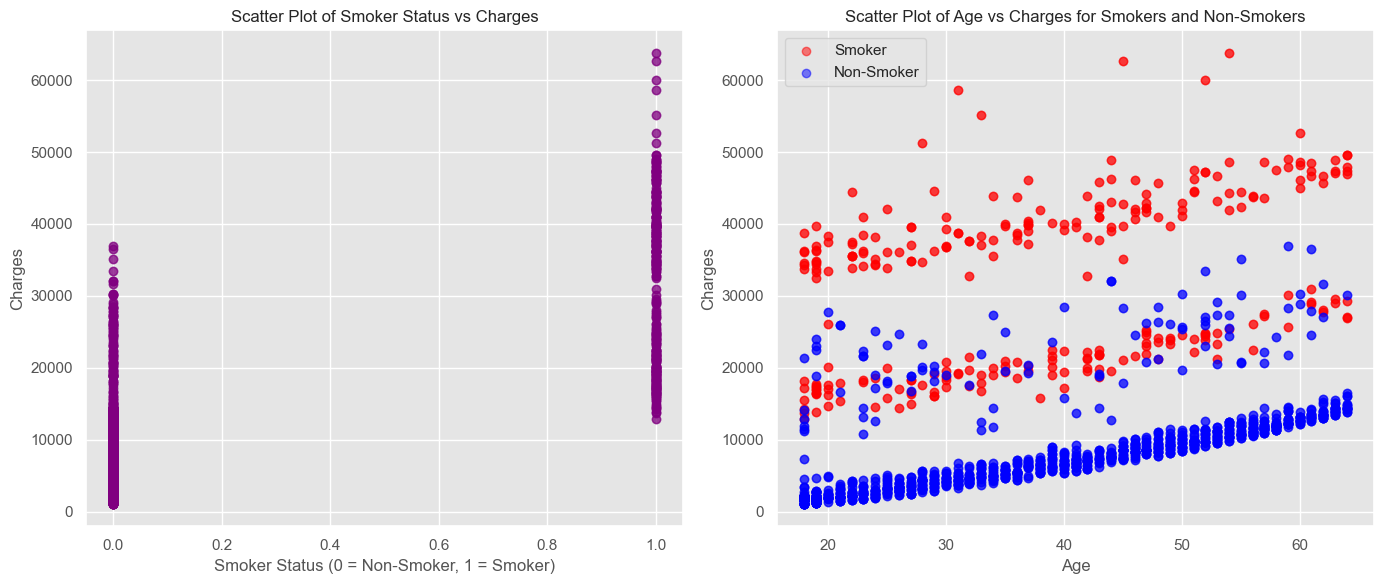

Covariance between Smoker Status and Charges: 3859.41
Covariance between Age and Charges for Smokers: 60307.36
Covariance between Age and Charges for Non-Smokers: 52719.16


In [159]:
from scipy.stats import pearsonr  # Import pearsonr for calculating Pearson correlation

# Scatter plot for Smoker Status vs Charges
plt.figure(figsize=(14, 6))

# Scatter plot for Smoker Status vs Charges
plt.subplot(1, 2, 1)
plt.scatter(dfInput['smoker'], dfInput['charges'], alpha=0.5, color='purple')
plt.title('Scatter Plot of Smoker Status vs Charges')
plt.xlabel('Smoker Status (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Charges')
plt.grid(True)

# Calculate Pearson correlation for Smoker Status and Charges
smoker_charges_corr, _ = pearsonr(dfInput['smoker'], dfInput['charges'])
print(f"Pearson's correlation between Smoker Status and Charges: {smoker_charges_corr:.2f}")

# Scatter plot for Age vs Charges separated by Smoker Status
plt.subplot(1, 2, 2)
plt.scatter(dfInput[dfInput['smoker'] == 1]['age'], dfInput[dfInput['smoker'] == 1]['charges'], 
            alpha=0.5, color='red', label='Smoker')
plt.scatter(dfInput[dfInput['smoker'] == 0]['age'], dfInput[dfInput['smoker'] == 0]['charges'], 
            alpha=0.5, color='blue', label='Non-Smoker')
plt.title('Scatter Plot of Age vs Charges for Smokers and Non-Smokers')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Covariance calculation
smoker_charges_cov = np.cov(dfInput['smoker'], dfInput['charges'])[0, 1]
age_charges_cov_smokers = np.cov(dfInput[dfInput['smoker'] == 1]['age'], dfInput[dfInput['smoker'] == 1]['charges'])[0, 1]
age_charges_cov_non_smokers = np.cov(dfInput[dfInput['smoker'] == 0]['age'], dfInput[dfInput['smoker'] == 0]['charges'])[0, 1]

print(f"Covariance between Smoker Status and Charges: {smoker_charges_cov:.2f}")
print(f"Covariance between Age and Charges for Smokers: {age_charges_cov_smokers:.2f}")
print(f"Covariance between Age and Charges for Non-Smokers: {age_charges_cov_non_smokers:.2f}")


#### Hypothesis Testing

##### To test the hypothesis, "BMI is a significant predictor of medical expenses, regardless of smoking status",correlation test between BMI and medical charges separately for smokers and non-smokers is performed. This will help determine if BMI has a significant impact on medical expenses and whether this relationship holds consistently across smoking status.

##### The correlation test quantifies the strength of association between BMI and charges, and by computing a p-value, the likelihood of observing this relationship by chance can be evaluated.

In [162]:
# Separate the data based on smoking status
smoker_data = dfInput[dfInput['smoker'] == 1]
non_smoker_data = dfInput[dfInput['smoker'] == 0]

# Compute the Pearson correlation between BMI and charges for both groups
corr_smoker, p_value_smoker = pearsonr(smoker_data['bmi'], smoker_data['charges'])
corr_non_smoker, p_value_non_smoker = pearsonr(non_smoker_data['bmi'], non_smoker_data['charges'])

print("BMI vs Charges Correlation Test")
print(f"Smokers: Correlation = {corr_smoker:.2f}, p-value = {p_value_smoker:.4f}")
print(f"Non-Smokers: Correlation = {corr_non_smoker:.2f}, p-value = {p_value_non_smoker:.4f}")

# Interpretation of p-values and correlations
if p_value_smoker < 0.05:
    print("For smokers, there is a statistically significant correlation between BMI and charges.")
else:
    print("For smokers, the correlation between BMI and charges is not statistically significant.")

if p_value_non_smoker < 0.05:
    print("For non-smokers, there is a statistically significant correlation between BMI and charges.")
else:
    print("For non-smokers, the correlation between BMI and charges is not statistically significant.")


BMI vs Charges Correlation Test
Smokers: Correlation = 0.81, p-value = 0.0000
Non-Smokers: Correlation = 0.08, p-value = 0.0003
For smokers, there is a statistically significant correlation between BMI and charges.
For non-smokers, there is a statistically significant correlation between BMI and charges.


#### Regression Analysis

#####  Linear regression analysis using BMI as an explanatory variable and medical charges as the dependent variable will be conducted. This will help analyze the relationship between BMI and medical expenses, based on the hypothesis:

##### "BMI is a significant predictor of medical expenses, regardless of smoking status."

##### In this analysis, StatsModels will be used to perform the linear regression.

In [165]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Perform linear regression with BMI as an explanatory variable and charges as the dependent variable
# fit a model without considering smoking status (simpler model)

# Define the regression formula: dependent variable ~ independent variable(s)
formula = 'charges ~ bmi'

# Fit the model using statsmodels
model = smf.ols(formula, data=dfInput).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     115.2
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           2.29e-26
Time:                        01:15:58   Log-Likelihood:                -29948.
No. Observations:                2772   AIC:                         5.990e+04
Df Residuals:                    2770   BIC:                         5.991e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1097.5183   1155.499      0.950      0.3

##### Coefficient Interpretation

- **Intercept**: The intercept value of **1097.5183** represents the estimated baseline of medical expenses when BMI is zero. However, since a BMI of zero is not practically meaningful, the intercept mainly serves as a mathematical baseline for the model.
- **Slope for BMI**: The coefficient for BMI is **396.1993**, indicating that for each unit increase in BMI, medical expenses are expected to increase by approximately **$396.20**. This positive slope suggests a direct relationship, where higher BMI values are associated with increased medical expenses.

##### Statistical Significance (p-value)

- The p-value for the BMI coefficient is **0.000**, which is well below the 0.05 threshold. This result indicates that BMI is a statistically significant predictor of medical expenses, meaning the observed effect is unlikely due to chance.

##### Model Fit (R-squared)

- **R-squared**: The R-squared value of **0.040** suggests that the model explains approximately **4%** of the variance in medical expenses based on BMI alone. Although BMI is a significant predictor, this low R-squared value indicates that there are likely other factors not included in this model that explain a substantial portion of the variability in medical expenses.


##### Summary

In conclusion, the regression analysis reveals that BMI is a statistically significant predictor of medical expenses, with higher BMI associated with increased costs. However, the model’s low R-squared value suggests that BMI alone is not a strong predictor, and other factors may play a significant role in determining medical expenses.
